# Market segmentation

# Task Steps:

### Step 1: Load the Social Marketing Dataset and clean the data by reducing adult and spam data

1.Load the Social Marketing data.<br>
2.Filtered out most of the adult and spam tweets by filtering out adult tweets greater than 2 by a user<br>

### Step 2: Applying K-means clustering alogrithm on the scaled data by finding the optimal K-value

1.Standarize the data by sclaing it.<br>
2.Find the optimal K-value by using elbow plot and silhouette plot .<br>

### Step 3: Applying K-means clustering alogrithm on the scaled and reduced using the optimal K value 

1.Apply K-means cluster on scaled and set n-cluster = optimal K value.<br>
2.Apply PCA and tSNE to reduce the data and fit K-means clustering to understand if reducing the dimenion of data helps build better clusters<br>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from collections import Counter
import matplotlib.pyplot as plt


In [2]:
from sklearn.metrics import silhouette_score

In [3]:
sm = pd.read_csv("social_marketing.csv")

In [4]:
sm.head()

,Unnamed: 0,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
0,hmjoe4g3k,2,0,2,2,2,1,1,0,4,...,1,0,1,1,0,11,0,0,0,0
1,clk1m5w8s,3,3,2,1,1,1,4,1,2,...,0,0,0,1,4,0,0,0,0,0
2,jcsovtak3,6,3,4,3,1,5,0,2,1,...,0,1,0,1,0,0,1,0,0,0
3,3oeb4hiln,1,5,2,2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,fd75x1vgk,5,2,0,6,1,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
sm.columns

Index(['Unnamed: 0', 'chatter', 'current_events', 'travel', 'photo_sharing',
       'uncategorized', 'tv_film', 'sports_fandom', 'politics', 'food',
       'family', 'home_and_garden', 'music', 'news', 'online_gaming',
       'shopping', 'health_nutrition', 'college_uni', 'sports_playing',
       'cooking', 'eco', 'computers', 'business', 'outdoors', 'crafts',
       'automotive', 'art', 'religion', 'beauty', 'parenting', 'dating',
       'school', 'personal_fitness', 'fashion', 'small_business', 'spam',
       'adult'],
      dtype='object')

In [6]:
sm.shape

(7882, 37)

In [7]:
sm[sm.adult != 0].describe()

,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,family,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,...,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,4.456140,1.594737,1.717544,2.471930,0.938596,0.929825,1.587719,1.475439,1.545614,0.982456,...,1.122807,0.707018,1.066667,0.705263,0.892982,1.449123,0.943860,0.464912,0.084211,5.577193
std,3.390622,1.251631,1.995392,2.555552,0.960421,1.466194,2.001807,2.716271,1.827016,1.213446,...,2.004127,1.220844,1.462758,1.677141,1.228307,2.214755,1.713281,0.713661,0.290318,4.079419
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000
75%,6.000000,2.000000,2.000000,3.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,8.000000
max,20.000000,8.000000,18.000000,17.000000,5.000000,10.000000,13.000000,33.000000,14.000000,9.000000,...,15.000000,8.000000,10.000000,16.000000,11.000000,15.000000,14.000000,4.000000,2.000000,26.000000


In [8]:
sm[sm['adult'] > 2 ].shape

(426, 37)

In [9]:
# Removing Adult and Spam tweets

sm =sm[(sm['adult'] < 2)]

In [10]:
sm.head()

,Unnamed: 0,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
0,hmjoe4g3k,2,0,2,2,2,1,1,0,4,...,1,0,1,1,0,11,0,0,0,0
1,clk1m5w8s,3,3,2,1,1,1,4,1,2,...,0,0,0,1,4,0,0,0,0,0
2,jcsovtak3,6,3,4,3,1,5,0,2,1,...,0,1,0,1,0,0,1,0,0,0
3,3oeb4hiln,1,5,2,2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,fd75x1vgk,5,2,0,6,1,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
sm.describe()

,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,family,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,...,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,4.397643,1.521339,1.573500,2.711828,0.802601,1.078445,1.593686,1.806801,1.385449,0.854356,...,1.091993,0.702750,0.908684,0.710879,0.758569,1.463081,0.998645,0.326379,0.000813,0.009348
std,3.544030,1.268649,2.301507,2.740246,0.933086,1.668843,2.171086,3.049246,1.768683,1.124405,...,1.907926,1.332715,1.515970,1.790634,1.183661,2.417282,1.833665,0.608961,0.028502,0.096240
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,2.000000,2.000000,4.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
max,26.000000,8.000000,26.000000,21.000000,9.000000,17.000000,20.000000,37.000000,16.000000,10.000000,...,20.000000,14.000000,14.000000,24.000000,10.000000,19.000000,18.000000,6.000000,1.000000,1.000000


Annotators has classified lots of tweets as chatter and uncategorized

In [12]:
sm[sm['uncategorized']> 0].shape

(4016, 37)

In [13]:
# Standardize the data (scaling)
X = sm.drop(["Unnamed: 0"], axis = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X.head()

,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,family,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
0,2,0,2,2,2,1,1,0,4,1,...,1,0,1,1,0,11,0,0,0,0
1,3,3,2,1,1,1,4,1,2,2,...,0,0,0,1,4,0,0,0,0,0
2,6,3,4,3,1,5,0,2,1,1,...,0,1,0,1,0,0,1,0,0,0
3,1,5,2,2,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4,5,2,0,6,1,0,0,2,0,1,...,0,0,0,0,0,0,0,1,0,0


In [15]:
X.corr()

,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,family,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
chatter,1.000000,0.159603,0.015828,0.537816,0.068157,0.012343,0.011791,0.052036,-0.008005,0.081046,...,-0.024969,0.019434,0.017226,0.183490,0.118533,0.028500,0.056798,0.119171,0.004848,0.009758
current_events,0.159603,1.000000,0.048504,0.153372,0.030287,0.081611,0.059895,0.065797,0.059168,0.062165,...,0.063483,0.072114,0.045893,0.025382,0.067588,0.037825,0.058901,0.063684,0.022005,0.003360
travel,0.015828,0.048504,1.000000,0.028121,0.030071,0.099873,-0.009683,0.665372,0.078205,0.013117,...,0.060223,0.015252,0.043401,0.090677,0.018502,-0.005583,0.025485,0.122731,-0.002977,-0.005244
photo_sharing,0.537816,0.153372,0.028121,1.000000,0.096245,0.019522,0.017555,0.036910,0.003546,0.102125,...,0.002272,0.315038,0.042266,0.028859,0.111478,0.061614,0.344669,0.143094,0.001265,-0.009308
uncategorized,0.068157,0.030287,0.030071,0.096245,1.000000,0.168578,-0.000535,-0.002928,0.037982,-0.005709,...,0.020401,0.134997,0.002869,0.130144,0.059900,0.080543,0.139070,0.080730,0.011130,-0.006608
tv_film,0.012343,0.081611,0.099873,0.019522,0.168578,1.000000,0.029966,0.032109,0.082303,0.019810,...,0.047227,0.016883,-0.002471,0.003646,0.024612,-0.002355,0.017038,0.187737,0.001508,-0.017222
sports_fandom,0.011791,0.059895,-0.009683,0.017555,-0.000535,0.029966,1.000000,0.064998,0.536399,0.441677,...,0.637681,0.121926,0.609727,0.015508,0.495375,0.010399,0.028180,0.052045,-0.003421,-0.003868
politics,0.052036,0.065797,0.665372,0.036910,-0.002928,0.032109,0.064998,1.000000,0.059487,0.044315,...,0.025228,-0.013367,0.040006,0.077595,0.025293,-0.011207,-0.009813,0.114233,-0.001311,-0.021087
food,-0.008005,0.059168,0.078205,0.003546,0.037982,0.082303,0.536399,0.059487,1.000000,0.375449,...,0.592729,0.102822,0.548207,0.035663,0.432996,0.222503,0.032583,0.067112,0.009911,-0.002863
family,0.081046,0.062165,0.013117,0.102125,-0.005709,0.019810,0.441677,0.044315,0.375449,1.000000,...,0.449458,0.117231,0.417565,0.021818,0.336532,0.030900,0.059316,0.061319,-0.004761,-0.002442


In [16]:
# Initialize an empty list to store inertia values
inertia = []

# Try K values from 1 to 10 (you can adjust this range)
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

/Users/anubhavnehru/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anubhavnehru/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anubhavnehru/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anubhavnehru/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

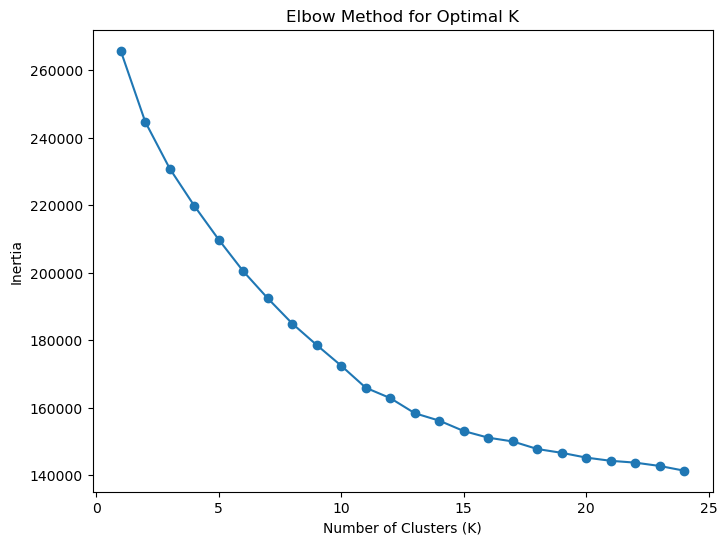

In [17]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 25), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

/Users/anubhavnehru/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anubhavnehru/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anubhavnehru/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anubhavnehru/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

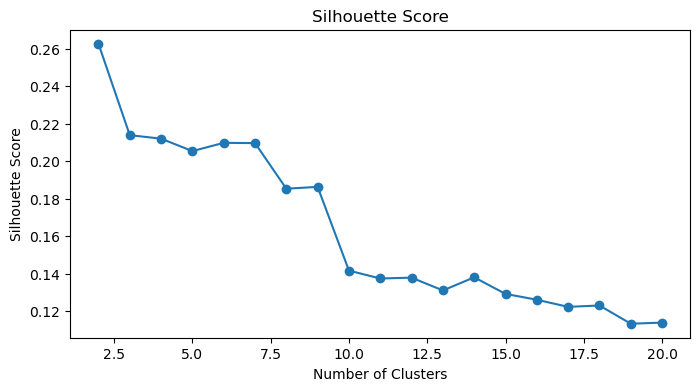

In [18]:
# Silhouette Score
silhouette_scores = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plot Silhouette Score
plt.figure(figsize=(8, 4))
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Based on the Silhouette and Elbow graph, we have choosen 10 as the optimal value of K

In [19]:
optimal_k = 10  # Replace with your chosen optimal K value

final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# Count the occurrences of each cluster label
cluster_labels, cluster_counts = np.unique(final_clusters, return_counts=True)

# Get the cluster centroids
centroids = final_kmeans.cluster_centers_

# Create a DataFrame for cluster centroids with feature names as columns
centroid_df = pd.DataFrame(centroids, columns=X.columns)

# Define the number of top important columns to consider
num_top_columns = 5

# Find the top important columns for each cluster
top_columns_per_cluster = {}
for cluster_id, centroid in enumerate(centroids):
    top_columns = centroid_df.columns[np.argsort(centroid)[-num_top_columns:]][::-1]
    top_columns_per_cluster[cluster_id] = top_columns

# Print the top important columns for each cluster
# Iterate through dictionary items and list elements
for cluster_num, (cluster_indices, top_columns) in enumerate(zip(top_columns_per_cluster.items(), list(cluster_counts))):
    cluster_id, cluster_columns = cluster_indices
    print(f"Cluster {cluster_id}: Top {num_top_columns} important columns")
    print(cluster_columns)
    print(f"Cluster {cluster_id} Size : {top_columns}\n")

/Users/anubhavnehru/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: Top 5 important columns
Index(['religion', 'parenting', 'sports_fandom', 'food', 'school'], dtype='object')
Cluster 0 Size : 627

Cluster 1: Top 5 important columns
Index(['health_nutrition', 'personal_fitness', 'outdoors', 'eco', 'food'], dtype='object')
Cluster 1 Size : 732

Cluster 2: Top 5 important columns
Index(['travel', 'politics', 'computers', 'news', 'business'], dtype='object')
Cluster 2 Size : 341

Cluster 3: Top 5 important columns
Index(['tv_film', 'art', 'music', 'small_business', 'crafts'], dtype='object')
Cluster 3 Size : 423

Cluster 4: Top 5 important columns
Index(['adult', 'spam', 'dating', 'uncategorized', 'current_events'], dtype='object')
Cluster 4 Size : 3084

Cluster 5: Top 5 important columns
Index(['online_gaming', 'college_uni', 'sports_playing', 'art', 'family'], dtype='object')
Cluster 5 Size : 331

Cluster 6: Top 5 important columns
Index(['spam', 'adult', 'outdoors', 'personal_fitness', 'college_uni'], dtype='object')
Cluster 6 Size : 6

Clus

### Let's see if reducing the dimension of the data will help us 

/Users/anubhavnehru/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anubhavnehru/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


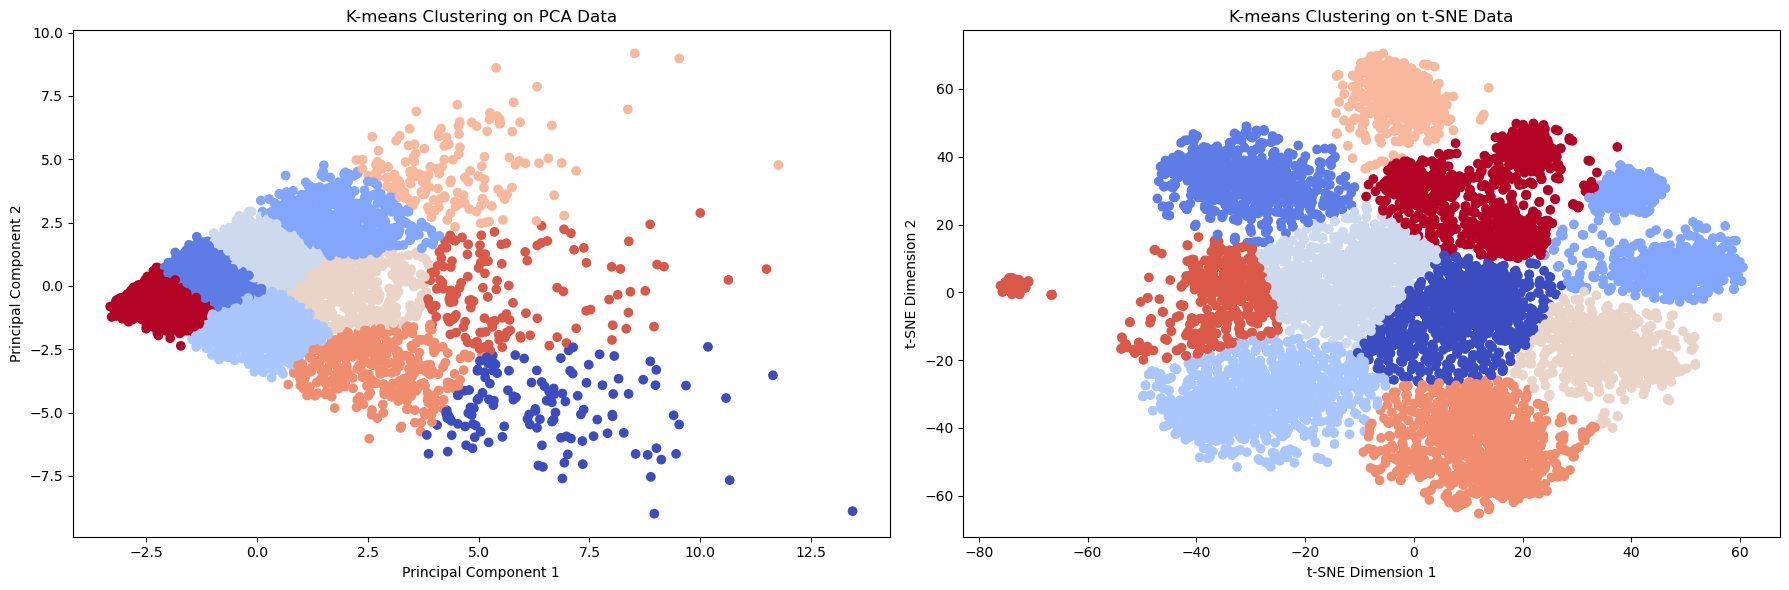

In [20]:
# Apply PCA and t-SNE (replace with your data)
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, random_state=42)

pca_result = pca.fit_transform(X_scaled)
tsne_result = tsne.fit_transform(X_scaled)


# Fit K-means clustering with 2 clusters on PCA data
kmeans_pca = KMeans(n_clusters = 10,init = 'k-means++', random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_result)

# Fit K-means clustering with 2 clusters on t-SNE data
kmeans_tsne = KMeans(n_clusters = 10,init = 'k-means++', random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(tsne_result)

# Visualize the results
plt.figure(figsize=(18, 6))


plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters_pca, cmap='coolwarm')
plt.title("K-means Clustering on PCA Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters_tsne, cmap='coolwarm')
plt.title("K-means Clustering on t-SNE Data")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

plt.tight_layout()
plt.show()


As seen in the plot above, the clusters are not depicting much information about each clusters and are spread out and the boundaries and not clearly drawn for them, making it difficult to analyze data in each cluster

#### Final Report for the NutrientH20 Marketing segments :

After leveraging the K-means cloustering algorithm, we finalized 10 different Customers clusters/segments for the brand <br>

- Cluster 0 : This user audience comprises of family audience, and we need to pass messaging suitable for family audience
- Custer 1 : The user audience in this cluster is fitness and adventure enthusiasts, and we can pass fitness, adventure or healthy food specific messages 
- Custer 2 : The user audience is a generic newspaper reader like audience, and we can pass messages in line with day-to-day news or events in politics, travel, etc
- Custer 3 : This audience is art and craft lover audience, and we can pass messages specific to cinema, music and small business crafts
- Custer 4 : This is mostly teen and young crowd cluster, which can be targeted by messages in line with dating and current events.
- Custer 5 : This audience is a college going audience which talks more about gaming, university and family
- Custer 6 : This audience in the cluster talks about adult content, fitness and universities, they must be enrolled in a univeristy and is young audience
- Custer 7 : In the cluster, the audience may predominantly be female audience which genrally talks about beauty, fashion and music
- Custer 8 : This audience might be socially active people and generally tweet about shopping, business and sharing and getting updates about  events.
- Custer 9 : People in this cluster,may be male who like to go out, discuss politics , watch sports and automotive enthusiasts.